In [272]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# File to Load
file_to_load = "Resources/owid-covid-data.csv"

# Read Purchasing File and store into Pandas DataFrame
covid_data = pd.read_csv(file_to_load)

In [223]:
covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116542,ZWE,Africa,Zimbabwe,2021-09-09,126056.0,125.0,134.000,4521.0,4.0,10.286,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
116543,ZWE,Africa,Zimbabwe,2021-09-10,126163.0,107.0,118.857,4532.0,11.0,10.714,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
116544,ZWE,Africa,Zimbabwe,2021-09-11,126220.0,57.0,113.571,4536.0,4.0,10.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN
116545,ZWE,Africa,Zimbabwe,2021-09-12,126269.0,49.0,102.714,4538.0,2.0,8.000,...,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN


In [224]:
#Extract interested columns
stringency = covid_data[['location', 'date', 'stringency_index', 'total_deaths_per_million','new_deaths_smoothed_per_million', 'total_cases_per_million', 'new_cases_smoothed_per_million']]
stringency

,location,date,stringency_index,total_deaths_per_million,new_deaths_smoothed_per_million,total_cases_per_million,new_cases_smoothed_per_million
0,Afghanistan,2020-02-24,8.33,NaN,NaN,0.126,NaN
1,Afghanistan,2020-02-25,8.33,NaN,NaN,0.126,NaN
2,Afghanistan,2020-02-26,8.33,NaN,NaN,0.126,NaN
3,Afghanistan,2020-02-27,8.33,NaN,NaN,0.126,NaN
4,Afghanistan,2020-02-28,8.33,NaN,NaN,0.126,NaN
...,...,...,...,...,...,...,...
116542,Zimbabwe,2021-09-09,NaN,299.559,0.682,8352.410,8.879
116543,Zimbabwe,2021-09-10,NaN,300.288,0.710,8359.500,7.875
116544,Zimbabwe,2021-09-11,NaN,300.553,0.663,8363.277,7.525
116545,Zimbabwe,2021-09-12,NaN,300.686,0.530,8366.523,6.806


In [225]:
#Drop NaN values and duplicates
clean_stringency = stringency.dropna(inplace=False).drop_duplicates()
clean_stringency

,location,date,stringency_index,total_deaths_per_million,new_deaths_smoothed_per_million,total_cases_per_million,new_cases_smoothed_per_million
28,Afghanistan,2020-03-23,41.67,0.025,0.004,1.004,0.054
29,Afghanistan,2020-03-24,50.93,0.025,0.004,1.054,0.057
30,Afghanistan,2020-03-25,59.26,0.025,0.004,1.858,0.172
31,Afghanistan,2020-03-26,59.26,0.050,0.007,2.008,0.194
32,Afghanistan,2020-03-27,59.26,0.050,0.007,2.284,0.240
...,...,...,...,...,...,...,...
116535,Zimbabwe,2021-09-02,78.70,294.789,0.880,8290.259,10.715
116536,Zimbabwe,2021-09-03,78.70,295.319,0.786,8304.372,10.365
116537,Zimbabwe,2021-09-04,78.70,295.915,0.719,8310.600,10.015
116538,Zimbabwe,2021-09-05,78.70,296.975,0.767,8318.883,10.535


In [226]:
#DF info
clean_stringency.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86419 entries, 28 to 116539
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   location                         86419 non-null  object 
 1   date                             86419 non-null  object 
 2   stringency_index                 86419 non-null  float64
 3   total_deaths_per_million         86419 non-null  float64
 4   new_deaths_smoothed_per_million  86419 non-null  float64
 5   total_cases_per_million          86419 non-null  float64
 6   new_cases_smoothed_per_million   86419 non-null  float64
dtypes: float64(5), object(2)
memory usage: 5.3+ MB


In [387]:
rename_stringency = clean_stringency.rename(columns={"location": "Location",
                                               "date": "Date",
                                               "stringency_index": "Stringency Index",
                                               "total_deaths_per_million": "Total Deaths Per Million",
                                               "new_deaths_smoothed_per_million": "Total Deaths Smoothed Per Million",
                                               "total_cases_per_million": "Total Cases Per Million",
                                               "new_cases_smoothed_per_million": "Total Cases Smoothed Per Million"})
rename_stringency

,Location,Date,Stringency Index,Total Deaths Per Million,Total Deaths Smoothed Per Million,Total Cases Per Million,Total Cases Smoothed Per Million
28,Afghanistan,2020-03-23,41.67,0.025,0.004,1.004,0.054
29,Afghanistan,2020-03-24,50.93,0.025,0.004,1.054,0.057
30,Afghanistan,2020-03-25,59.26,0.025,0.004,1.858,0.172
31,Afghanistan,2020-03-26,59.26,0.050,0.007,2.008,0.194
32,Afghanistan,2020-03-27,59.26,0.050,0.007,2.284,0.240
...,...,...,...,...,...,...,...
116535,Zimbabwe,2021-09-02,78.70,294.789,0.880,8290.259,10.715
116536,Zimbabwe,2021-09-03,78.70,295.319,0.786,8304.372,10.365
116537,Zimbabwe,2021-09-04,78.70,295.915,0.719,8310.600,10.015
116538,Zimbabwe,2021-09-05,78.70,296.975,0.767,8318.883,10.535


In [416]:
clean_stringency_groupby = rename_stringency.groupby(["Location"]).agg({"Total Deaths Per Million":["max"], "Total Cases Per Million":["max"], "Stringency Index":["median"]}).dropna(how='all').reset_index()
clean_stringency_groupby

,Location,Total Deaths Per Million,Total Cases Per Million,Stringency Index
,,max,max,median
0,Afghanistan,173.137,3771.517,28.70
1,Albania,861.489,48080.464,60.19
2,Algeria,86.313,3293.436,72.22
3,Andorra,1680.585,194986.685,51.85
4,Angola,29.292,1240.953,65.74
...,...,...,...,...
168,Venezuela,132.347,11116.342,86.11
169,Vietnam,139.566,5612.739,69.91
170,Yemen,44.932,229.152,31.48


In [417]:
median_stringency_index = clean_stringency_groupby["Stringency Index", "median"]
max_total_deaths = clean_stringency_groupby["Total Deaths Per Million", "max"]
max_total_cases = clean_stringency_groupby["Total Cases Per Million", "max"]

analysis = pd.DataFrame({"Median Stringency Index": median_stringency_index,
                         "Total Deaths Per Million": max_total_deaths,
                         "Total Cases Per Million": max_total_cases})
analysis

,Median Stringency Index,Total Deaths Per Million,Total Cases Per Million
0,28.70,173.137,3771.517
1,60.19,861.489,48080.464
2,72.22,86.313,3293.436
3,51.85,1680.585,194986.685
4,65.74,29.292,1240.953
...,...,...,...
168,86.11,132.347,11116.342
169,69.91,139.566,5612.739
170,31.48,44.932,229.152
171,45.37,191.167,10949.250


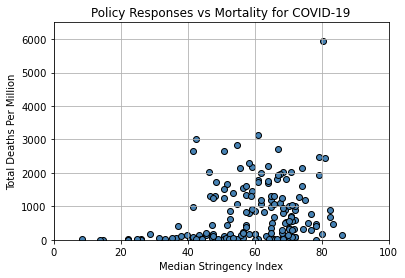

In [418]:
x_values = (analysis["Median Stringency Index"])
y_values = (analysis["Total Deaths Per Million"])
plt.scatter(x_values, y_values, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.title("Policy Responses vs Mortality for COVID-19")
plt.xlabel("Median Stringency Index")
plt.ylabel("Total Deaths Per Million")
plt.xlim(0, 100)
plt.ylim(0, 6500)
plt.grid()
plt.show()

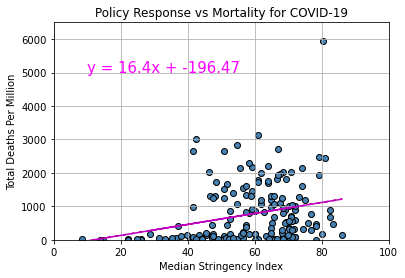

In [419]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values, y_values, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.plot(x_values, regress_values, "m--")
plt.annotate(line_eq, (10, 5000), fontsize = 15, color = "magenta")
plt.title("Policy Response vs Mortality for COVID-19")
plt.xlabel("Median Stringency Index")
plt.ylabel("Total Deaths Per Million")
plt.xlim(0, 100)
plt.ylim(0, 6500)
plt.grid()
plt.show()

In [420]:
print(f"The correlation coefficient between policy response and mortality is {round(st.pearsonr(x_values, y_values)[0],2)}")

The correlation coefficient between policy response and mortality is 0.28


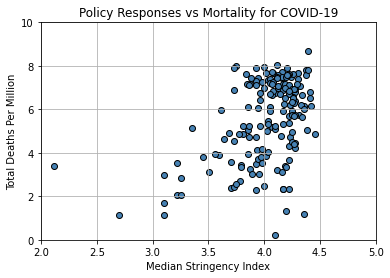

In [421]:
x_values1 = np.log(analysis["Median Stringency Index"])
y_values1 = np.log(analysis["Total Deaths Per Million"])
plt.scatter(x_values1, y_values1, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.title("Policy Responses vs Mortality for COVID-19")
plt.xlabel("Median Stringency Index")
plt.ylabel("Total Deaths Per Million")
plt.xlim(2, 5)
plt.ylim(0, 10)
plt.grid()
plt.show()

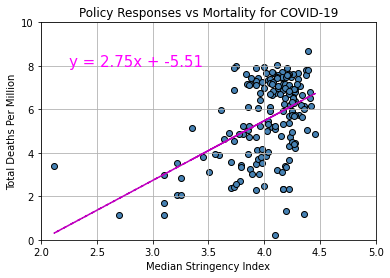

In [422]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values1, y_values1)
regress_values = x_values1 * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values1, y_values1, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.plot(x_values1, regress_values, "m--")
plt.annotate(line_eq, (2.25, 8), fontsize = 15, color = "magenta")
plt.title("Policy Responses vs Mortality for COVID-19")
plt.xlabel("Median Stringency Index")
plt.ylabel("Total Deaths Per Million")
plt.xlim(2, 5)
plt.ylim(0, 10)
plt.grid()
plt.show()

In [423]:
print(f"The correlation coefficient between policy response and mortality is {round(st.pearsonr(x_values1, y_values1)[0],2)}")

The correlation coefficient between policy response and mortality is 0.49


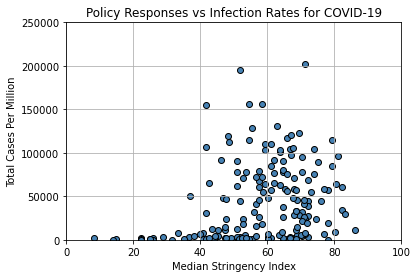

In [424]:
x_values2 = (analysis["Median Stringency Index"])
y_values2 = (analysis["Total Cases Per Million"])
plt.scatter(x_values2, y_values2, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.title("Policy Responses vs Infection Rates for COVID-19")
plt.xlabel("Median Stringency Index")
plt.ylabel("Total Cases Per Million")
plt.xlim(0, 100)
plt.ylim(0, 250000)
plt.grid()
plt.show()

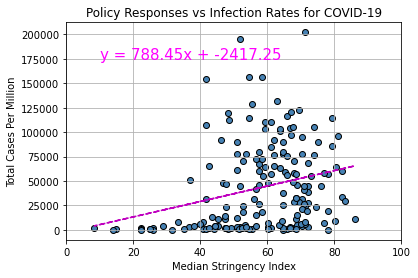

In [425]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values2, y_values2)
regress_values = x_values2 * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values2, y_values2, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.plot(x_values2, regress_values, "m--")
plt.annotate(line_eq, (10, 175000), fontsize = 15, color = "magenta")
plt.title("Policy Responses vs Infection Rates for COVID-19")
plt.xlabel("Median Stringency Index")
plt.ylabel("Total Cases Per Million")
plt.xlim(0, 100)
plt.grid()
plt.show()

In [426]:
print(f"The correlation coefficient between policy response and mortality is {round(st.pearsonr(x_values2, y_values2)[0],2)}")

The correlation coefficient between policy response and mortality is 0.27


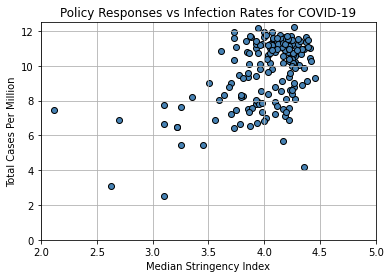

In [427]:
x_values3 = np.log(analysis["Median Stringency Index"])
y_values3 = np.log(analysis["Total Cases Per Million"])
plt.scatter(x_values3, y_values3, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.title("Policy Responses vs Infection Rates for COVID-19")
plt.xlabel("Median Stringency Index")
plt.ylabel("Total Cases Per Million")
plt.xlim(2, 5)
plt.ylim(0, 12.5)
plt.grid()
plt.show()

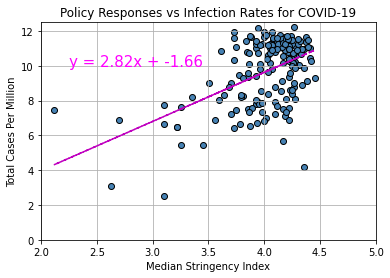

In [428]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values3, y_values3)
regress_values = x_values3 * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values3, y_values3, marker = "o", facecolors = "steelblue", edgecolors = "black")
plt.plot(x_values3, regress_values, "m--")
plt.annotate(line_eq, (2.25, 10), fontsize = 15, color = "magenta")
plt.title("Policy Responses vs Infection Rates for COVID-19")
plt.xlabel("Median Stringency Index")
plt.ylabel("Total Cases Per Million")
plt.xlim(2, 5)
plt.ylim(0, 12.5)
plt.grid()
plt.show()

In [429]:
print(f"The correlation coefficient between policy response and mortality is {round(st.pearsonr(x_values3, y_values3)[0],2)}")

The correlation coefficient between policy response and mortality is 0.51
